
NAG
1621.91721188
1307.86679902
913.137888706
446.237621167
120.899936642
210.999583732
304.629995284
365.820325903
408.529206739
434.453359564
433.046415913
419.294657731
400.69093521
359.381272574
314.204683327
268.027057173
205.970376743
152.630804095
116.215743661
102.806428644
110.575137732
130.816678452
153.488123103
171.413103631
175.884667422
167.703567904
155.081165893
135.787699143
112.639867162
100.304454423
98.0907673425
100.365397886
101.98017662
102.384081925
101.091486381
96.4531660137
91.494665581
87.1836408394
83.9240750748
81.7939867496
80.2509857743
78.9794133178
76.9997978678
74.9966199567
72.9192462534
71.0651495936
69.4709353512
68.1163013867
66.94772428
65.886252422
64.947509855
63.9763579837
63.184123837
62.4947009299
61.9502943968
61.5422159658
61.1600964439
60.8347059374
60.5754441305
60.3160679457
60.1034983818
59.9115947078
59.6941611793
59.4615224268
59.2253529854
59.0239462636
58.8392100576
58.6850846134
58.5547061187
58.4406177294
58.3462441359
58.267342

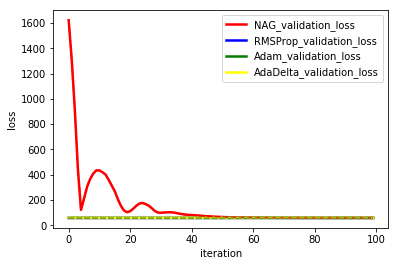

In [5]:
from sklearn.datasets import load_svmlight_file as load
import numpy as np
import matplotlib.pyplot as plt

#================================= definition ================================

def compute_loss(w, b, x, y):
    n = x.shape[1]
    total = 0
    for z in range(x.shape[0]):
        if np.sum((1 - y[z] * (x[z] * w + b[z]))) > 0:
            total += np.sum((1 - y[z] * (x[z] * w + b[z])))
    loss = np.sum(np.square(w)) / (2*n) + C * total
    print(loss)
    return loss


def NAG(w, b, v_w, v_b, mu):
    for i in range(iteration):
        w_gradient = np.zeros((x_train.shape[1],1))
        b_gradient = 0
        w_ahead = w + mu * v_w
        b_ahead = b + mu * v_b * np.ones((x_train.shape[0],1))

        # parts of samples
        pad = np.random.randint(1, 5)
        for j in range(0, x_train.shape[0], pad):
            if np.sum((1 - y_train[j] * (x_train[j] * w_ahead + b[j]))) > 0:
                w_gradient += x_train[j].T * (-1 * y_train[j])
            else:
                w_gradient += 0
            if np.sum((1 - y_train[j] * (x_train[j] * w + b_ahead[j]))) > 0:
                b_gradient += -y_train[j]
            else:
                b_gradient += 0

        dw = w_ahead + C * w_gradient
        db = C * b_gradient

        v_w = mu * v_w - learning_rate * dw
        v_b = mu * v_b - learning_rate * db
        w += v_w
        b += v_b * np.ones((x_train.shape[0],1))

        NAG_validation_loss.append(compute_loss(w, b, x_validation, y_validation))


def RMSprop(w, b, eps, decay_rate, cache_w, cache_b):
    for i in range(iteration):
        w_gradient = np.zeros((x_train.shape[1],1))
        b_gradient = 0

        # parts of samples
        pad = np.random.randint(1, 5)
        for j in range(0, x_train.shape[0], pad):
            if np.sum((1 - y_train[j] * (x_train[j] * w + b[j]))) > 0:
                w_gradient += x_train[j].T * (-1 * y_train[j])
                b_gradient += -y_train[j]
            else:
                w_gradient += 0
                b_gradient += 0

        dw = w + C * w_gradient
        db = C * b_gradient

        cache_w = decay_rate * cache_w + (1 - decay_rate) * np.square(dw)
        w += - learning_rate * dw / (np.sqrt(cache_w) + eps)

        cache_b = decay_rate * cache_b + (1 - decay_rate) * db ** 2
        b += - learning_rate * db / (np.sqrt(cache_b) + eps[0]) * np.ones((x_train.shape[0],1))

        RMSProp_validation_loss.append(compute_loss(w, b, x_validation, y_validation))


def Adam(w, b, eps, m_w, v_w, m_b, v_b, beta1=0.9, beta2=0.999):
    for i in range(iteration):
        w_gradient = np.zeros((x_train.shape[1],1))
        b_gradient = 0

        # parts of samples
        pad = np.random.randint(1, 5)
        for j in range(0, x_train.shape[0], pad):
            if np.sum((1 - y_train[j] * (x_train[j] * w + b[j]))) > 0:
                w_gradient += x_train[j].T * (-1 * y_train[j])
                b_gradient += -y_train[j]
            else:
                w_gradient += 0
                b_gradient += 0

        dw = w + C * w_gradient
        db = C * b_gradient

        m_w = beta1 * m_w + (1 - beta1) * dw
        v_w = beta2 * v_w + (1 - beta2) * np.square(dw)

        m_b = beta1 * m_b + (1 - beta1) * db
        v_b = beta2 * v_b + (1 - beta2) * db ** 2

        w += - learning_rate * m_w / (np.sqrt(v_w) + eps)
        b += - learning_rate * m_b / (np.sqrt(v_b) + eps[0]) * np.ones((x_train.shape[0],1))

        Adam_validation_loss.append(compute_loss(w, b, x_validation, y_validation))


def AdaDelta(w, b, eps, n_steps = 50, decay_rate = 0.9 ):
    for i in range(iteration):
        mean_gradient_w = np.zeros((x_train.shape[1], 1))
        mean_step_w = np.zeros((x_train.shape[1], 1))
        mean_gradient_b = 0
        mean_step_b = 0
        w_gradient = np.zeros((x_train.shape[1],1))
        b_gradient = 0

        # parts of samples
        pad = np.random.randint(1, 5)
        for j in range(0, x_train.shape[0], pad):
            if np.sum((1 - y_train[j] * (x_train[j] * w + b[j]))) > 0:
                w_gradient += x_train[j].T * (-1 * y_train[j])
                b_gradient += -y_train[j]
            else:
                w_gradient += 0
                b_gradient += 0

        dw = w + C * w_gradient
        db = C * b_gradient

        for k in range(n_steps):
            mean_gradient_w = decay_rate * mean_gradient_w + (1 - decay_rate) * np.square(dw)
            temp = np.sqrt(((mean_step_w + eps) / (mean_gradient_w + eps)))
            steps_w = -np.multiply(temp, dw)
            mean_step_w = decay_rate * mean_step_w + (1 - decay_rate) * np.square(steps_w)
            w += steps_w

            mean_gradient_b = decay_rate * mean_gradient_b + (1 - decay_rate) * np.square(db)
            temp = np.sqrt(((mean_step_b + eps[0]) / (mean_gradient_b + eps[0])))
            steps_b = -np.multiply(temp, db)
            mean_step_b = decay_rate * mean_step_b + (1 - decay_rate) * np.square(steps_b)
            b += steps_b * np.ones((x_train.shape[0],1))

        AdaDelta_validation_loss.append(compute_loss(w, b, x_validation, y_validation))


#================================= load data ================================

train_data = load('./a9a')
test_data = load('./a9a.t',n_features=123)

x_train, y_train = train_data[0], train_data[1]
x_validation, y_validation = test_data[0], test_data[1]
x_train,x_validation,y_train,y_validation = x_train.todense(),x_validation.todense(),y_train.reshape(len(y_train),-1),y_validation.reshape(len(y_validation),-1)

# ============================== initialization ============================

init_b = np.zeros((x_train.shape[0],1))
init_w = np.ones((x_train.shape[1],1))

iteration = 100
learning_rate = 0.001
C = 0.01
NAG_validation_loss=[]      #记录每次迭代的NAG的loss值    0.001
RMSProp_validation_loss=[]  #记录每次迭代的RMSProp的loss值  0.001
Adam_validation_loss=[]     #记录每次迭代的Adam的loss值    0.001
AdaDelta_validation_loss=[] #记录每次迭代的AdaDelta的loss值  0.001

#================================ training ================================

#for NAG
print('\nNAG')
NAG(init_w, init_b, v_w = np.zeros((x_train.shape[1],1)), v_b=0, mu=0.9 )

#for RMSProp
print('\nRMSProp')
RMSprop(init_w, init_b, decay_rate =0.9, eps = 1e-6 * np.ones((x_train.shape[1],1)),
        cache_w = np.empty((x_train.shape[1],1)), cache_b = 0)

#for Adam
print('\nAdam')
Adam(init_w, init_b, eps=1e-8 * np.ones((x_train.shape[1],1)), m_w = np.zeros((x_train.shape[1],1)),
     v_w = np.zeros((x_train.shape[1],1)), m_b = 0, v_b = 0 ,beta1=0.9, beta2=0.999)

#for AdaDelta
print('\nAdaDelta')
AdaDelta(init_w, init_b, eps = 1e-8 * np.ones((x_train.shape[1],1)), n_steps = 50, decay_rate = 0.9)


#=============================== show result =================================

t = np.arange(0, iteration, 1)
plt.plot(t, NAG_validation_loss, color="red", linewidth=2.5, linestyle="-", label="NAG_validation_loss")
plt.plot(t, RMSProp_validation_loss, color="blue",  linewidth=2.5, linestyle="-", label="RMSProp_validation_loss")
plt.plot(t, Adam_validation_loss, color="green", linewidth=2.5, linestyle="-", label="Adam_validation_loss")
plt.plot(t, AdaDelta_validation_loss, color="yellow", linewidth=2.5, linestyle="-", label="AdaDelta_validation_loss")
plt.legend(loc='upper right')
plt.plot(t, NAG_validation_loss, 'r--',t, RMSProp_validation_loss, 'b--',t,Adam_validation_loss,'g--',t,AdaDelta_validation_loss,'y--')
#plt.plot(t, NAG_validation_loss, 'r--')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()
